In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
loanDF=pd.read_csv("data.csv")

# Data Correction


In [3]:
loanDF.drop_duplicates(inplace=True);
loanDF.dropna(inplace=True);
loanDF['originationDate'] = pd.to_datetime(loanDF['originationDate'])

C:\Users\Hello\AppData\Local\Temp\ipykernel_10076\1338355240.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loanDF['originationDate'] = pd.to_datetime(loanDF['originationDate'])


In [7]:
loanDF

,loanNumber,originationDate,loanAmount,loanTerm,intRate,vehicleModelName,vehicleNewUsedCode,vehicleModelYear,vehicleValueAmount,obligorCreditScore,coObligorIndicator,paymentToIncomePercentage,obligorState,scheduledInterestAmount,scheduledPrincipalAmount,beginningLoanBal,endingLoanBal,maturationDate
0,5274786,2022-06-01,30834.27,73 months,0.0319,CAMRY,New,2022,34639.0,697,False,0.16850000,FL,78.85,392.25,29666.94,29296.33,2028/7
1,6224415,2017-08-01,35694.04,6 yrs,0.0190,C-HR,New,2018,23470.0,780,False,0.07520000,FL,10.68,514.25,6753.51,6234.41,6/0
2,5254898,2022-07-01,37729.22,62 months,0.0479,4RUNNER,New,2022,53654.0,821,False,0.22410000,NC,148.37,559.99,36639.43,36639.43,2027/9
3,5267640,2022-06-01,39990.00,76m,0.0399,TACOMA TRD,New,2022,40105.0,684,False,0.06570000,SC,128.25,475.06,38617.99,38136.08,2028/10
4,5385389,2021-11-01,33157.92,64 months,0.0199,RAV4 HYBRI,New,2021,43041.0,756,False,0.01730000,NC,46.63,508.08,28136.87,27629.24,2027/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50038,6092858,2018-04-01,38662.94,61 months,0.0190,TUNDRA 4X4,New,2018,44730.0,862,True,0.07520000,NC,7.44,668.53,4672.68,4003.23,2023/5
50039,6100955,2018-03-01,21000.00,62 months,0.0090,COROLLA,New,2018,22904.0,832,False,0.10850000,NC,1.87,356.19,2500.53,2144.18,2023/5
50040,5244136,2022-08-01,35417.32,61m,0.0624,TACOMA SR5,New,2022,35283.0,750,True,0.07890000,FL,181.54,507.12,34900.95,34382.46,2027/9
50041,6118657,2018-02-01,26315.52,78 months,0.0569,CAMRY,New,2018,25589.0,757,False,0.24800000,NC,41.29,376.48,8815.59,8432.39,2024/8


# Question 1.

In [11]:
def Maturation_Date(x,y):
    if 'yrs' in x or 'y' in x:
        x=x.replace('years','')
        x=x.replace('yrs','')
        x=x.replace('y','')
        x=x.strip()
        x=int(x)
        year = x
        month = 0
    else:
        x=x.replace('months','')
        x=x.replace('m','')
        x=x.strip()
        x=int(x)
        year=x//12
        month=x%12
    year += y[0]
    t = month + y[1]
    if t>12:
        year += 1
        month = t%12
    else:
        month = t
    return {'year':year,'month':month}

for i in loanDF.index:
    y = loanDF.loc[i,'originationDate'].year
    m = loanDF.loc[i,'originationDate'].month
    mat_year = Maturation_Date((loanDF.loc[i,'loanTerm']),[y,m])['year']
    mat_month = Maturation_Date((loanDF.loc[i,'loanTerm']),[y,m])['month']
    loanDF.loc[i,'maturationDate']=(f"{mat_year}/{mat_month}")
    
    

In [12]:
loanDF['maturationDate']

0         2028/7
1         2023/8
2         2027/9
3        2028/10
4         2027/3
          ...   
50038     2023/5
50039     2023/5
50040     2027/9
50041     2024/8
50042     2028/5
Name: maturationDate, Length: 50039, dtype: object

# Question 2.

In [15]:
from datetime import datetime

current_date = datetime.now()
current_year = current_date.year
current_month = current_date.month

for i in loanDF.index:
    x=loanDF.loc[i,'maturationDate'].split('/')
    remaining_years=int(x[0])-current_year
    remaining_months=int(x[1]) - current_month
    if remaining_months<0:
        remaining_years -= 1
        remaining_months += 12
    if ((remaining_years<0) or (remaining_months<0)):
        loanDF.loc[i,'remainingTerm']=f"loan expired"
    else:
        loanDF.loc[i,'remainingTerm']=f"{remaining_years} Years, {remaining_months} Months"        
    

In [16]:
loanDF['remainingTerm']

0         5 Years, 0 Months
1         0 Years, 1 Months
2         4 Years, 2 Months
3         5 Years, 3 Months
4         3 Years, 8 Months
                ...        
50038          loan expired
50039          loan expired
50040     4 Years, 2 Months
50041     1 Years, 1 Months
50042    4 Years, 10 Months
Name: remainingTerm, Length: 50039, dtype: object

# Question 3.

In [18]:
stateno={}
stateloan={}
for i in loanDF.index:
    state=loanDF.loc[i,'obligorState']
    loan=int(loanDF.loc[i,'loanAmount']) 
    if state in stateno:
        stateno[state]=stateno[state]+1
    else:
        stateno[state]=1
        
    if state in stateloan:
        stateloan[state]=stateloan[state]+loan
    else:
        stateloan[state]=loan

print("State with max total loan is:",max(stateloan, key=stateloan.get))
print("State with max no of loans taken is:",max(stateno, key=stateno.get))

State with max total loan is: FL
State with max no of loans taken is: FL


# Question 4.

fraction of used vehicle in month no. 0 is 0.08230152949745084
fraction of used vehicle in month no. 1 is 0.08413547237076649
fraction of used vehicle in month no. 2 is 0.08017366136034733
fraction of used vehicle in month no. 3 is 0.06988390621443205
fraction of used vehicle in month no. 4 is 0.057835613391168945
fraction of used vehicle in month no. 5 is 0.07807118254879448
fraction of used vehicle in month no. 6 is 0.07102973639787041
fraction of used vehicle in month no. 7 is 0.07299721620785649
fraction of used vehicle in month no. 8 is 0.0867992766726944
fraction of used vehicle in month no. 9 is 0.06766428106701367
fraction of used vehicle in month no. 10 is 0.06707983959168794
fraction of used vehicle in month no. 11 is 0.06503067484662577


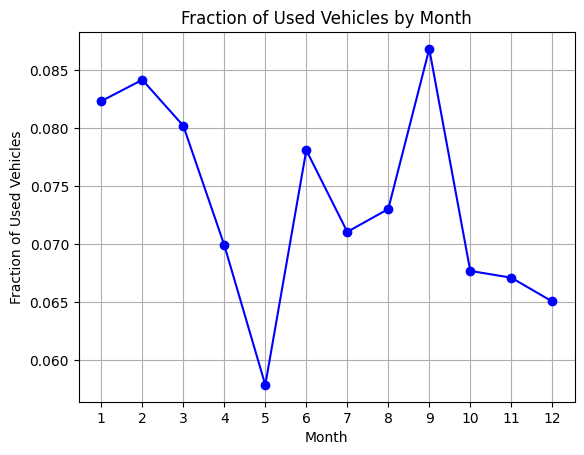

In [31]:
months = [[0, 0] for _ in range(12)]
for i in loanDF.index:
    m = loanDF.loc[i,'originationDate'].month
    months[m-1][0] += 1
    if loanDF.loc[i,'vehicleNewUsedCode'] != 'New':
        months[m-1][1] += 1
for i,month in enumerate(months):
    print(f"fraction of used vehicle in month no. {i} is {float(month[1]/month[0])}")

# Plot the graph
fractions = [month_data[1] / month_data[0] if month_data[0] != 0 else 0 for month_data in months]

months = [i for i in range(1, 13)]  # x-axis representing months (1 to 12)
plt.plot(months, fractions, marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Fraction of Used Vehicles')
plt.title('Fraction of Used Vehicles by Month')
plt.grid(True)
plt.xticks(months)
plt.show()

# Question 5.

In [57]:
defaultedLoan=0
for i in loanDF.index:
    if loanDF.loc[i,'endingLoanBal']==loanDF.loc[i,'beginningLoanBal']:
        loanDF.loc[i,'defaultedStatus']=True
        defaultedLoan+=1
    else:
        loanDF.loc[i,'defaultedStatus']=False
defaultedLoanPercentage=(defaultedLoan*100)/i
print("percentage of defaulted loans is",defaultedLoanPercentage)

percentage of defaulted loans is 5.743175732384797


# Question 6.

In [58]:
noOfCoownedLoan=0
noOfLoanLt3=0
for i in loanDF.index:
    if loanDF.loc[i,'coObligorIndicator']==True and loanDF.loc[i,'vehicleNewUsedCode']=='Used':
        noOfCoownedLoan+=1
        if loanDF.loc[i,'intRate']<=0.03:
            noOfLoanLt3+=1
percentageOfCoownedLoan=(noOfLoanLt3*100)/noOfCoownedLoan
print("percentage of loans with interestrates <3% and are used and coowned is:",percentageOfCoownedLoan)

percentage of loans with interestrates <3% and are used and coowned is: 0.8968609865470852


# Question 7.

In [59]:
vehicalModel={}
for i in loanDF.index:
    if loanDF.loc[i,'obligorState']=='FL':
        x=loanDF.loc[i,'vehicleModelName']+" "+str(loanDF.loc[i,'vehicleModelYear'])
        if x in vehicalModel:
            vehicalModel[x]=vehicalModel[x]+1
        else:
            vehicalModel[x]=1
print("The most famous model in FL is",max(vehicalModel, key=vehicalModel.get))

The most famous model in FL is COROLLA 2022


# Question 8.

In [69]:
buckets = pd.cut(loanDF['obligorCreditScore'], bins=5)
grouped_data = loanDF.groupby(buckets)
bucket_counts = grouped_data.size()
defaulted_counts = grouped_data['defaultedStatus'].sum()
result_df = pd.DataFrame({'Bucket_Counts': bucket_counts, 'Defaulted_Counts': defaulted_counts})
result_df['Defaulted_Ratio'] = result_df['Defaulted_Counts'] / result_df['Bucket_Counts'].replace(0, 1)

print(bucket_counts)
print(defaulted_counts)
print(result_df)

obligorCreditScore
(-0.893, 178.6]      768
(178.6, 357.2]         0
(357.2, 535.8]         0
(535.8, 714.4]     12838
(714.4, 893.0]     36433
dtype: int64
obligorCreditScore
(-0.893, 178.6]      66
(178.6, 357.2]        0
(357.2, 535.8]        0
(535.8, 714.4]      960
(714.4, 893.0]     1848
Name: defaultedStatus, dtype: object
                    Bucket_Counts Defaulted_Counts Defaulted_Ratio
obligorCreditScore                                                
(-0.893, 178.6]               768               66        0.085938
(178.6, 357.2]                  0                0             0.0
(357.2, 535.8]                  0                0             0.0
(535.8, 714.4]              12838              960        0.074778
(714.4, 893.0]              36433             1848        0.050723


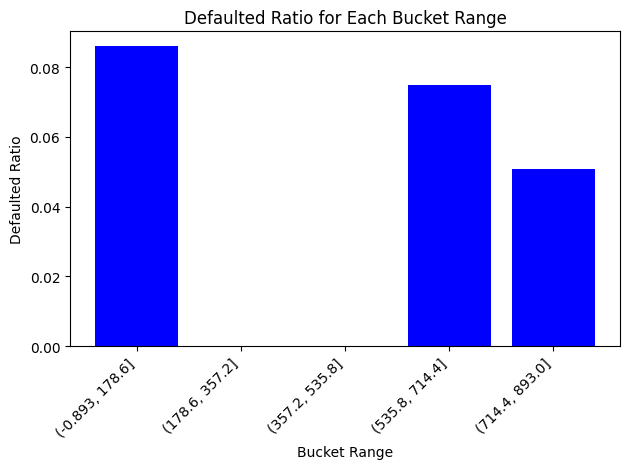

In [70]:
bucket_ranges = result_df.index.astype(str)

plt.bar(bucket_ranges, result_df['Defaulted_Ratio'], color='blue')
plt.xlabel('Bucket Range')
plt.ylabel('Defaulted Ratio')
plt.title('Defaulted Ratio for Each Bucket Range')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()  # To prevent label cutoffs
plt.show()

